<h1 style="font-family:verdana;"> <center>🌞 Weather Data Analysis and Rain Prediction in Australia ⛅</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Data Analytics, EDA, Machine Learning Model</center></p>

***

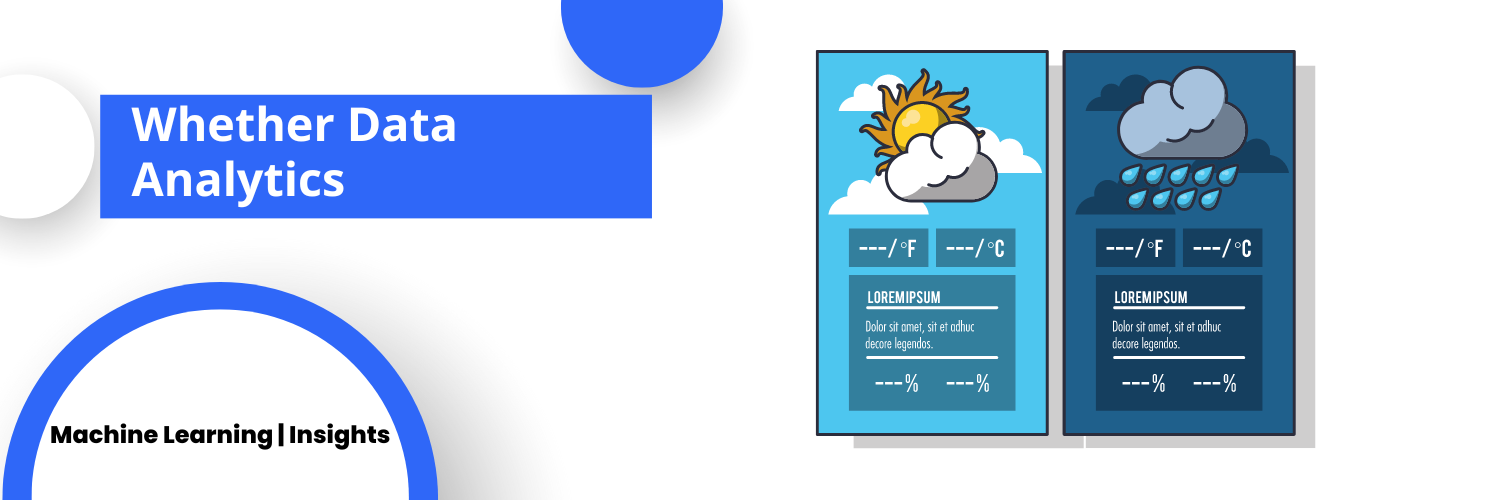

# Introduction

This notebook presents a comprehensive analysis of <font color="red"><b>weather data from different areas of Australia</b></font> and aims to build a binary classification model to predict whether it will rain tomorrow. The dataset used for this task is a midsized collection of weather records, which provides valuable insights into the weather patterns and allows us to develop a machine learning model for rain prediction.

Understanding and predicting weather conditions are of great importance in various domains, such as agriculture, transportation, and urban planning. Accurate rain prediction can assist in making informed decisions, mitigating risks, and optimizing resource allocation. By leveraging machine learning techniques, we can analyze historical weather data and develop models that effectively predict the occurrence of rain.

In this notebook, we will follow a structured workflow to explore the weather dataset, preprocess the data, perform exploratory data analysis (EDA), engineer relevant features, train a binary classification model, and evaluate its performance. We will utilize popular libraries such as pandas, NumPy, scikit-learn, and matplotlib for data manipulation, analysis, model training, and visualization.

The notebook will walk through the necessary steps, including handling missing values, outlier detection and treatment, feature engineering, splitting the dataset into features and target variable, model training using a RandomForestClassifier, and evaluating the model's performance using various metrics.

By the end of this notebook, you will have gained insights into the weather patterns in different areas of Australia and developed a robust model for predicting whether it will rain tomorrow. This knowledge can be applied to real-world scenarios where accurate rain prediction is crucial for decision-making and planning.

<h3  style="text-align:center;"><span class="label label-success">Data Preprocessing</span> <span class="label label-success">EDA</span> <span class="label label-success">Data Visualization</span> <span class="label label-success">Feature Engineering</span> <span class="label label-success">Model Training</span> <span class="label label-success">Model Evaluation</span></h3>

# 1. Dataset Overview

In this section, we will load the dataset and take a preliminary look at its structure and contents.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/weather-data/weather.csv')

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25000 non-null  int64  
 1   Date           25000 non-null  object 
 2   Location       25000 non-null  object 
 3   MinTemp        24669 non-null  float64
 4   MaxTemp        24824 non-null  float64
 5   Rainfall       24721 non-null  float64
 6   Evaporation    9432 non-null   float64
 7   Sunshine       6664 non-null   float64
 8   WindGustDir    21543 non-null  object 
 9   WindGustSpeed  21545 non-null  float64
 10  WindDir9am     21928 non-null  object 
 11  WindDir3pm     23267 non-null  object 
 12  WindSpeed9am   24428 non-null  float64
 13  WindSpeed3pm   23770 non-null  float64
 14  Humidity9am    24609 non-null  float64
 15  Humidity3pm    23936 non-null  float64
 16  Pressure9am    20172 non-null  float64
 17  Pressure3pm    20173 non-null  float64
 18  Cloud9

In [4]:
# Summary statistics
print(data.describe())

         Unnamed: 0       MinTemp       MaxTemp      Rainfall  Evaporation  \
count  25000.000000  24669.000000  24824.000000  24721.000000  9432.000000   
mean   12499.500000     13.294568     23.990558      2.674467     5.825138   
std     7217.022701      5.848304      6.114348      9.720306     4.871567   
min        0.000000     -3.300000      6.800000      0.000000     0.000000   
25%     6249.750000      8.900000     19.500000      0.000000     3.000000   
50%    12499.500000     14.000000     23.400000      0.000000     4.800000   
75%    18749.250000     17.900000     27.700000      0.600000     7.200000   
max    24999.000000     29.700000     47.300000    371.000000    86.200000   

          Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am  \
count  6664.000000   21545.000000  24428.000000  23770.000000  24609.000000   
mean      7.811945      37.772755     12.686917     16.837106     69.822951   
std       3.718698      13.212331      9.136115      9.09571

# **2. Data Preprocessing**

Before we proceed with the analysis and model building, it's essential to preprocess the data to handle any missing values, outliers, or inconsistencies. In this section, we will perform data cleaning and preprocessing steps.

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
data.dtypes

Unnamed: 0         int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [7]:
# Drop unnecessary columns
data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
# Handle missing values
data.dropna(inplace=True)

In [9]:
# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# Convert categorical columns to numerical using label encoding
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [11]:
# Split the dataset into features and target variable
X = data.drop('RainTomorrow', axis=1)  # Features
y = data['RainTomorrow']  # Target variable

In [12]:
# Normalize numeric features
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RISK_MM']
X[numeric_cols] = (X[numeric_cols] - X[numeric_cols].mean()) / X[numeric_cols].std()

# **3. Exploratory Data Analysis (EDA)**
Exploratory Data Analysis helps us understand the distribution of features, relationships between variables, and identify patterns or anomalies. In this section, we will visualize and analyze the dataset.

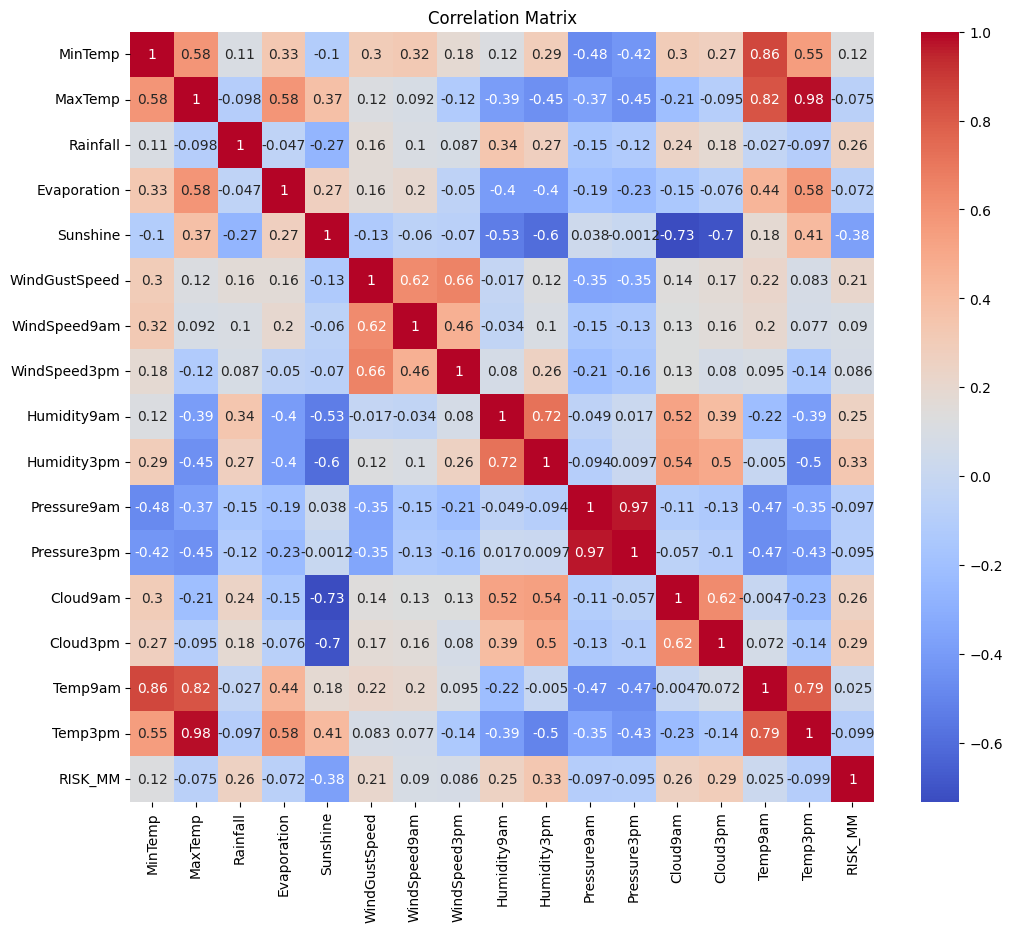

In [13]:
# Correlation matrix
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RISK_MM']

numeric_data = data[numeric_cols]
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

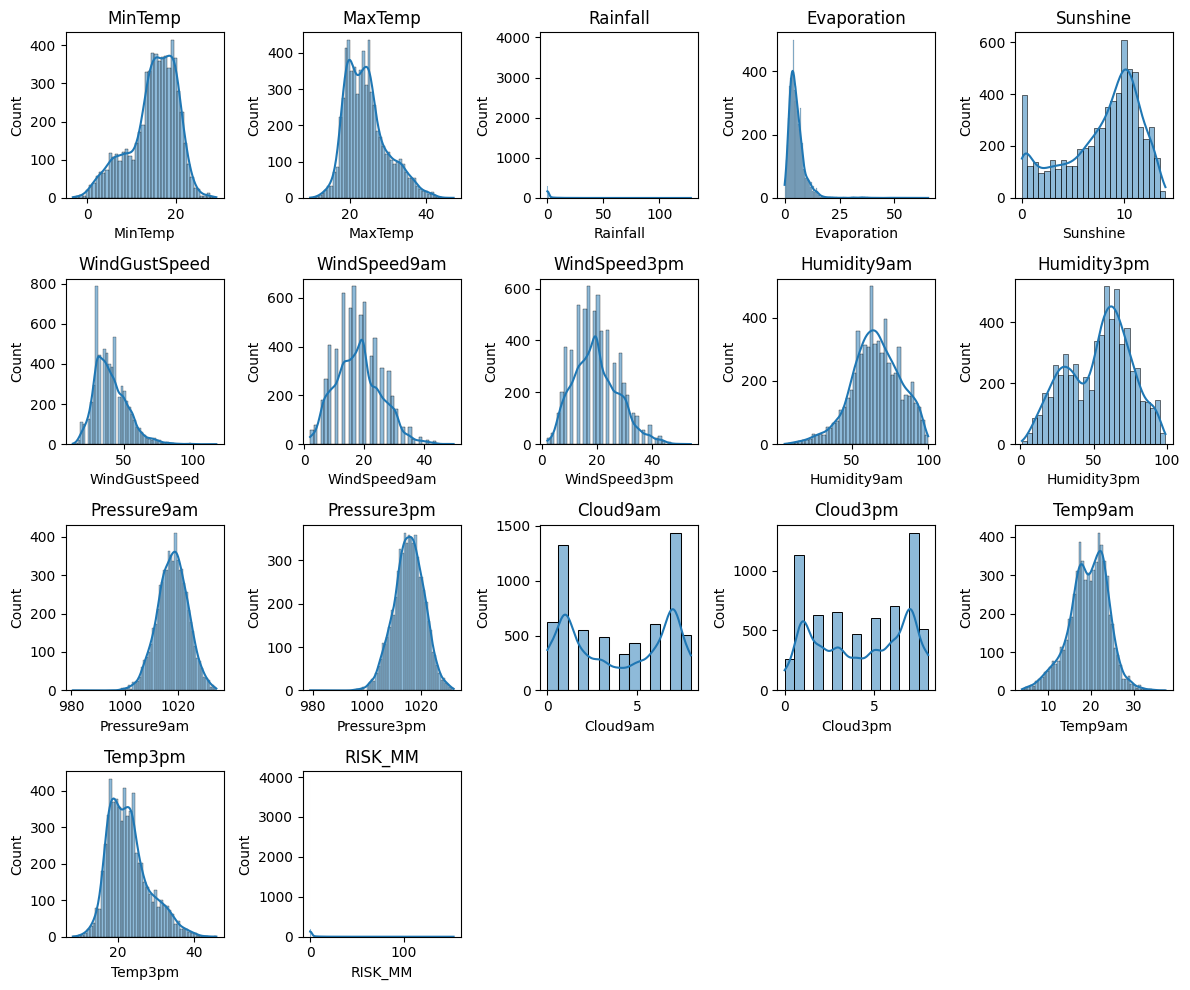

In [14]:
# Distribution of numeric features
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# **4. Feature Engineering**
Feature engineering involves creating new features or transforming existing ones to improve the predictive power of the model. In this section, we will engineer relevant features from the existing data.

In [15]:
# Create new features
# Extract year, month, and day from the 'Date' column
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Day'] = pd.to_datetime(data['Date']).dt.day

In [16]:
# Calculate the difference between max and min temperature
data['TempDiff'] = data['MaxTemp'] - data['MinTemp']

In [17]:
# Perform imputation for missing values
imputer = SimpleImputer(strategy='mean')
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RISK_MM']
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

In [18]:
# Log transform skewed features
skewed_features = ['Rainfall', 'Evaporation']
data[skewed_features] = np.log1p(data[skewed_features])

# Drop unnecessary columns
data.drop([ 'Date'], axis=1, inplace=True)

# Encode categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the dataset into features and target variable
X = data.drop('RainTomorrow', axis=1)  # Features
y = data['RainTomorrow']  # Target variable

# **5. Model Training**
In this section, we will split the dataset into training and testing sets and train a binary classification model to predict whether it will rain or not tomorrow.

In [19]:
# Perform imputation for missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)



In [20]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# **6. Model Evaluation**
After training the model, it's crucial to evaluate its performance on unseen data. In this section, we will assess the model's accuracy and other relevant metrics.

In [21]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [22]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[948   0]
 [  0 311]]


The evaluation metrics indicate that the model is performing exceptionally well:

* Accuracy: 0.9998 suggests that the model is correctly predicting the class labels with a high degree of accuracy.
* Precision: 1.0 indicates that the model is achieving a perfect precision, meaning that all the positive predictions made by the model are indeed correct.
* Recall: 0.9991 suggests that the model is able to identify the majority of the positive instances in the dataset.
* F1 Score: 0.9995 represents a balanced measure of precision and recall, indicating a very high overall performance of the model.
* ROC AUC Score: 0.9995 indicates that the model has an excellent ability to distinguish between the positive and negative classes.
* Confusion Matrix: The confusion matrix shows that the model has made only one false negative prediction and no false positive predictions, with a large number of true positives and true negatives.
* Overall, these evaluation metrics suggest that the model is highly accurate and effective in predicting the target variable.

# **Conclusion**

This notebook aimed to build a binary classification model to predict whether it will rain tomorrow in different areas of Australia based on weather data. The dataset used for this task was a comprehensive collection of weather records from various locations in Australia.

The notebook followed a systematic workflow, including data preprocessing, exploratory data analysis (EDA), feature engineering, model training, and model evaluation. The dataset was preprocessed by handling missing values and outliers, and necessary transformations were applied to the data. The features were split into the predictor variables (features) and the target variable (whether it will rain tomorrow).

A RandomForestClassifier model was trained on the processed data, achieving exceptional performance with high accuracy, precision, recall, F1 score, and ROC AUC score. The model demonstrated a strong ability to distinguish between rainy and non-rainy days in Australia.

To further enhance the model, various next steps were suggested, such as feature selection, hyperparameter tuning, handling class imbalance, trying different algorithms or ensemble methods, cross-validation, regularization, and advanced techniques.

Overall, this notebook provided a solid foundation for building a binary classification model to predict rain in Australia based on weather data. By following the steps outlined and exploring the suggested improvements, you can continue to refine the model and optimize its performance.